In [1]:
# crawling url
import requests
from bs4 import BeautifulSoup
import re

# crawling site
source_url = "https://namu.wiki/RecentChanges"

# do crawler by html
req = requests.get(source_url)
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name='table')
table_body = contents_table.find(name='tbody')
table_rows = table_body.find_all(name='tr')

page_url_base = 'https://namu.wiki'
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find('a')
    if td_url:
        page_url = page_url_base + td_url.get('href')
        page_urls.append(page_url)
        
page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)

https://namu.wiki/w/%EC%B2%AD%EA%B5%AC%EC%A4%91%ED%95%99%EA%B5%90
https://namu.wiki/w/joyn
https://namu.wiki/w/%ED%82%A4%EC%BC%80%20%EC%84%B8%ED%8B%B0%EC%97%94
https://namu.wiki/w/%EC%BD%9C%EB%9E%B4%20%ED%91%B8%EC%8A%88
https://namu.wiki/w/Into%20The%20Zone


In [2]:
# crawler by base of url page info
req = requests.get(page_urls[0])
html = req.content
soup = BeautifulSoup(html, 'lxml')
title = soup.find(name='h1').text
category = soup.find_all(name='ul')[2].text
content_clearfix = soup.find_all(name='div', attrs ={'class':'wiki-heading-content'})
content_clearfix = [ls_i.find(name='div', attrs={'class':'wiki-paragraph'}).text for ls_i in content_clearfix if ls_i.find(name='div', attrs={'class':'wiki-paragraph'})]

print(title)
print(category)
print(content_clearfix)

청구중학교 
대구광역시의 중학교청구학원1955년 개교남자중학교나무위키 학교 프로젝트나무위키 학교 문서 개선 프로젝트
['청구중학교(靑丘中學校)는 대구광역시 동구 국채보상로(신천동) 827번지에 위치한 동구의 유일한 남학교이다.', '1954년 12월 31일: 재단법인 덕화학원 인가, 황봉갑 이사장 취임', '사랑의 실천(근면, 정직, 봉사)', "원 속의 좌측은 'ㅊ'의 변형이요, 우측은 '어'와 '구'의 변형이며 중간의 원은 'ㅇ'의 변형이다. 이는 충만함의 상징이며 또한 청구인의 기개를 상칭한 것이다.", '', '청구중학교를 상징하는 교표가 가운데 새겨져 있으며 늠름하고 강인한 청구인의 기상을 상징하는 갈색과 온화하고 사랑스런 마음씨를 상징하는 노란색으로 구성되어 있다.', '향나무품위를 상징하고 긴 수명은 학교의 전통을 의미하며 다양한 용도는 지혜롭고 유능한 인간상을 나타내며, 드러내지 않는 향기는 덕있고, 봉사 할 줄 아는 청구인을 상징한다.', '개나리희망과 선구자적 성격을 나타내며 어느 곳이나 무성하게 잘 자람은 강인한 생명력을, 동시에 꽃을 피움은 단결을 나타내며, 고운 모양과 향기는 만인에 대한 사랑을 상징한다.', '운동장에는 인조잔디가 깔려있다. 고등학교와 같이 쓰기 때문에 편히 운동을 하기엔 무리가 있는 편. 실제로 체육시간에 고등학생까지 합쳐서 3~4개의 반이 같은 운동장을 쓰는 시간이 많다.[2] 정규수업 이후로는 축구부가 사용한다. 우천 시에는 교사들 지도에 따라 고등학교 복도를 통해 석당관 급식실로 이동하는데, 우산이 있는 학생에 한해 운동장을 가로질러 갈 수 있다. 하지만 대부분 우산없이 운동장을 가로질러 달려간다.', '주요 시설은 고등학교와 분리되어있지만 강당이나 영어실(원어민 교사)은 고등학교 건물과 연결된 석당관에 있다.석당관 강당은 체육수업 또는 특별한 행사가 아니면 고등학교만 사용할 수 있다.', '지상4층, 지하1층으로 되어있는 건물이다.1층은 사실상 반지하다.2,3학년 교실이 있으며 주요 교실이 위치해 있다.2018

# Analysis keyward of recent modifed page in namu wiki

## summarize analysis
Find trend knowledge information in realtime by namuwiki

## Crawling : Get web data

In [3]:
import pandas as pd
columns = ['title', 'category', 'content_text']
df = pd.DataFrame(columns=columns)

for page_url in page_urls:
    req = requests.get(page_url)
    html = req.content
    soup = BeautifulSoup(html, 'lxml')
    title = soup.find(name='h1')
    category = soup.find_all(name='ul')[2]
    content_clearfix = soup.find_all(name='div', attrs ={'class':'wiki-heading-content'})
    content_clearfix = [ls_i.find(name='div', attrs={'class':'wiki-paragraph'}).text.replace("\n", " ").strip() for ls_i in content_clearfix if ls_i.find(name='div', attrs={'class':'wiki-paragraph'})]
    
    if title is not None:
        title = title.text.replace('\n', ' ').strip()
    else:
        title = ""
    
    if not content_clearfix:
        content_clearfix = ""
    else:
        content_clearfix = " ".join(content_clearfix).strip()
        
    if category is not None:
        category = category.text.replace("\n", " ").replace("분류", "").strip()
    
    else:
        category = ""
        
    df = df.append(pd.Series([title, category, content_clearfix], index=df.columns), ignore_index=True)
    
df.head(5)
    

,title,category,content_text
0,청구중학교,대구광역시의 중학교청구학원1955년 개교남자중학교나무위키 학교 프로젝트나무위키 학교...,청구중학교(靑丘中學校)는 대구광역시 동구 국채보상로(신천동) 827번지에 위치한 동...
1,joyn,무선통신,대한민국의 통신 3사가 2012년 12월 26일에 동시에 서비스를 시작한 RCS(R...
2,키케 세티엔,나무위키 축구 프로젝트스페인의 축구선수스페인의 축구감독FC 바르셀로나/역대 감독,"스페인의 축구 감독, 현재 FC 바르셀로나 감독직을 수행 중이다. 꾸레들에게 발갓동..."
3,콜랴 푸슈,"1993년 출생독일의 축구선수바이어 04 레버쿠젠/은퇴, 이적켐니츠 FC/은퇴, 이...",독일 출신의 축구선수. FC 바이에른 뮌헨
4,Into The Zone,Just Shapes & Beats/수록곡,이전 곡 초반에는 오른쪽에서 기타 사운드에 맞춰서 오디오 스펙트럼을 연상시키는 막...


## Extract keyword information
  
Next stemp is text preprocessiong.  
In this page, we extract keword of namu wiki so we don't use numerical, english data.
(But i think english data is useful to get keyword but in this book it doesn't matter english keyword.)  


In [4]:
# text preprocessing function
import re

def text_cleaning(text):
    korean = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = korean.sub('', text)
    return result

text_cleaning(df['content_text'][0])

'청구중학교는 대구광역시 동구 국채보상로신천동 번지에 위치한 동구의 유일한 남학교이다 년 월 일 재단법인 덕화학원 인가 황봉갑 이사장 취임 사랑의 실천근면 정직 봉사 원 속의 좌측은 ㅊ의 변형이요 우측은 어와 구의 변형이며 중간의 원은 ㅇ의 변형이다 이는 충만함의 상징이며 또한 청구인의 기개를 상칭한 것이다  청구중학교를 상징하는 교표가 가운데 새겨져 있으며 늠름하고 강인한 청구인의 기상을 상징하는 갈색과 온화하고 사랑스런 마음씨를 상징하는 노란색으로 구성되어 있다 향나무품위를 상징하고 긴 수명은 학교의 전통을 의미하며 다양한 용도는 지혜롭고 유능한 인간상을 나타내며 드러내지 않는 향기는 덕있고 봉사 할 줄 아는 청구인을 상징한다 개나리희망과 선구자적 성격을 나타내며 어느 곳이나 무성하게 잘 자람은 강인한 생명력을 동시에 꽃을 피움은 단결을 나타내며 고운 모양과 향기는 만인에 대한 사랑을 상징한다 운동장에는 인조잔디가 깔려있다 고등학교와 같이 쓰기 때문에 편히 운동을 하기엔 무리가 있는 편 실제로 체육시간에 고등학생까지 합쳐서 개의 반이 같은 운동장을 쓰는 시간이 많다 정규수업 이후로는 축구부가 사용한다 우천 시에는 교사들 지도에 따라 고등학교 복도를 통해 석당관 급식실로 이동하는데 우산이 있는 학생에 한해 운동장을 가로질러 갈 수 있다 하지만 대부분 우산없이 운동장을 가로질러 달려간다 주요 시설은 고등학교와 분리되어있지만 강당이나 영어실원어민 교사은 고등학교 건물과 연결된 석당관에 있다석당관 강당은 체육수업 또는 특별한 행사가 아니면 고등학교만 사용할 수 있다 지상층 지하층으로 되어있는 건물이다층은 사실상 반지하다학년 교실이 있으며 주요 교실이 위치해 있다년부터 엘리베이터가 설치되었다 학년       반 컴퓨터실 행정실 교장실 교무실 방송실 세미나실 영어교실 영어교실은 특별한 일을 제외하고는 거의 사용하지 않는다 영어교실에  도 설치되어 있다 도서실 학년  반 학년  반 음악실 학생부실죽음의 방   학년  반 축구부생활관체육실미술실미술실 지상층 지하층으로 되

In [5]:
pre_processed_df = df.copy()
pre_processed_df['title'] = pre_processed_df['title'].apply(text_cleaning)
pre_processed_df['category'] = pre_processed_df['category'].apply(text_cleaning)
pre_processed_df['content_text'] = pre_processed_df['content_text'].apply(text_cleaning)
pre_processed_df.head(5)

,title,category,content_text
0,청구중학교,대구광역시의 중학교청구학원년 개교남자중학교나무위키 학교 프로젝트나무위키 학교 문서 ...,청구중학교는 대구광역시 동구 국채보상로신천동 번지에 위치한 동구의 유일한 남학교이다...
1,,무선통신,대한민국의 통신 사가 년 월 일에 동시에 서비스를 시작한 통신 규격과 그 통신...
2,키케 세티엔,나무위키 축구 프로젝트스페인의 축구선수스페인의 축구감독 바르셀로나역대 감독,스페인의 축구 감독 현재 바르셀로나 감독직을 수행 중이다 꾸레들에게 발갓동을 재평...
3,콜랴 푸슈,년 출생독일의 축구선수바이어 레버쿠젠은퇴 이적켐니츠 은퇴 이적 얀 레겐스부르크은퇴...,독일 출신의 축구선수 바이에른 뮌헨
4,,수록곡,이전 곡 초반에는 오른쪽에서 기타 사운드에 맞춰서 오디오 스펙트럼을 연상시키는 막...


In [6]:
# make corpus
## i don't know why get corpus each features
title_corpus = "".join(pre_processed_df['title'].tolist())
category_corpus = "".join(pre_processed_df['category'].tolist())
content_corpus = "".join(pre_processed_df['content_text'].tolist())
print(title_corpus)

청구중학교키케 세티엔콜랴 푸슈   고척 스카이돔파일  업데이트 현황파일  아드미라 바커 뫼들링파일 최로운파일 제천년기샌디브롤스타즈파일틀수원 삼성 블루윙즈크로우브롤스타즈파일 파일 행보긔정공법파일 한국석유공사출동 유후 구조대레온브롤스타즈크래쉬 밴디쿳일곱 개의 대죄  파일 아주르파이어 엠블렘서지언더테일차 창작   판타지아파일 파일    영훈파일 파일 우기여자아이들광주제일고등학교독일 축구 국가대표팀파일자화자찬남 오무라편애파일 토마스 복음서 아리스티아 피오니아 라 모니크카네아리 타미코파일    상연태즈루니 툰게일브롤스타즈고사만토빈 벨존 볼턴 기체 분류오지터가면라이더 가면라이더파일강다니엘음반하이힐파일  이가은신비아파트 시리즈팔선반점의 인육만두푸르게 빛나던 우리의 계절    파일 미소녀 만화경 신께서 내려주신 소녀들  프린세스 메이커 수확제파일 에도가와 란포문호 스트레이독스베르호얀스크민재파일 파일 존노류가사키 히이로황홀의 얀데레 포즈파일 파주시행정파일중앙중학교경기파일 파일전주솔내고등학교갈릴레이 돈나그 일이 일어난 방 백악관 회고록카로슈


In [7]:
# use konlpy
from konlpy.tag import Okt
from collections import Counter

nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)
count

Counter({'청구': 4,
         '중학교': 5,
         '대구광역시': 2,
         '동구': 2,
         '국채보상로': 1,
         '신천동': 1,
         '번지': 4,
         '위치': 34,
         '남': 10,
         '학교': 47,
         '년': 469,
         '월': 265,
         '일': 238,
         '재단법인': 1,
         '덕화': 1,
         '학원': 2,
         '황봉': 1,
         '갑': 1,
         '이사장': 1,
         '취임': 3,
         '사랑': 37,
         '실천': 2,
         '근면': 1,
         '정직': 1,
         '봉사': 3,
         '원': 8,
         '속': 39,
         '좌측': 2,
         '의': 128,
         '변형': 8,
         '우측': 2,
         '구의': 2,
         '중간': 10,
         '충만': 2,
         '함': 12,
         '상징': 14,
         '또한': 84,
         '청구인': 3,
         '기개': 1,
         '상칭': 1,
         '것': 654,
         '교표': 1,
         '가운데': 9,
         '기상': 2,
         '갈색': 1,
         '마음씨': 1,
         '노란색': 4,
         '구성': 19,
         '향나무': 1,
         '품위': 2,
         '수명': 3,
         '전통': 16,
         '의미': 22,
         '용도': 6,


In [8]:
# remove len(word) = 1
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'독일': 349, '때문': 210, '월드컵': 203, '카미': 194, '나리': 194, '자신': 175, '이후': 165, '앨리스': 164, '경기': 155, '볼턴': 151, '정도': 138, '사람': 127, '경우': 119, '다른': 116, '트럼프': 114, '틱톡': 110, '미국': 109, '시작': 108, '도로시': 107, '공격': 101, '축구': 97, '한국': 97, '캐릭터': 97, '문제': 96, '당시': 92, '하리': 90, '대표팀': 89, '모습': 88, '사실': 86, '대한': 85, '또한': 84, '생각': 84, '문서': 79, '내용': 79, '지역': 79, '다시': 77, '이전': 77, '제국': 77, '상황': 75, '영상': 75, '매우': 74, '이탈리아': 74, '현재': 73, '우승': 73, '문단': 72, '등장': 72, '북한': 72, '하이힐': 72, '업데이트': 71, '대회': 71, '게임': 70, '위해': 68, '리그': 65, '시간': 64, '아이': 64, '이름': 63, '부분': 63, '참고': 63, '전쟁': 63, '가장': 62, '가지': 61, '스타': 60, '편애': 60, '상대': 59, '하나': 57, '공개': 57, '기체': 57, '모두': 56, '실제': 55, '사용': 55, '진출': 55, '바로': 55, '국가': 55, '대통령': 54, '유로': 54, '현우': 54, '역시': 53, '평가': 53, '브라질': 53, '기록': 52, '능력': 52, '대한민국': 51, '세계': 51, '선수': 51, '지금': 48, '대해': 48, '레온': 48, '학교': 47, '인기': 47, '역사': 47, '해당': 47, '설명': 47, '승리': 46, '이미지': 46, '주장': 46, '체력':

In [9]:
# stop words
with open('../data/korean_stopwords.txt', encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [10]:
# namuwiki stop words
namu_wiki_stopwords = ['상위', '문서', '내용','누설', '아래', '해당', '설명', '표기', '추가', '모든', '시용', '매우', '가장', '줄거리', '요소', '상황', '편집', '틀',
                      '경우', '때문', '모습', '정도', '이후', '사실', '생각', '인물', '이름', '년월']
stopwords = stopwords + namu_wiki_stopwords

remove_char_counter = Counter({x: remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter({'독일': 349, '월드컵': 203, '카미': 194, '나리': 194, '앨리스': 164, '경기': 155, '볼턴': 151, '사람': 127, '트럼프': 114, '틱톡': 110, '미국': 109, '시작': 108, '도로시': 107, '공격': 101, '축구': 97, '한국': 97, '캐릭터': 97, '문제': 96, '당시': 92, '하리': 90, '대표팀': 89, '대한': 85, '지역': 79, '다시': 77, '이전': 77, '제국': 77, '영상': 75, '이탈리아': 74, '현재': 73, '우승': 73, '문단': 72, '등장': 72, '북한': 72, '하이힐': 72, '업데이트': 71, '대회': 71, '게임': 70, '위해': 68, '리그': 65, '부분': 63, '참고': 63, '전쟁': 63, '가지': 61, '스타': 60, '편애': 60, '상대': 59, '공개': 57, '기체': 57, '실제': 55, '사용': 55, '진출': 55, '국가': 55, '대통령': 54, '유로': 54, '현우': 54, '역시': 53, '평가': 53, '브라질': 53, '기록': 52, '능력': 52, '대한민국': 51, '세계': 51, '선수': 51, '지금': 48, '대해': 48, '레온': 48, '학교': 47, '인기': 47, '역사': 47, '승리': 46, '이미지': 46, '주장': 46, '체력': 45, '유니폼': 45, '지터': 45, '존재': 44, '중국': 44, '러시아': 44, '대부분': 43, '계속': 43, '스토리': 43, '파워': 43, '보고': 41, '상태': 41, '작품': 41, '출시': 40, '일반': 40, '크로우': 40, '이유': 39, '활약': 39, '마음': 39, '일본': 39, '회담': 39, '통해': 38, '관련': 38, '전용': 

## wordcloud

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(
    font_path='/Library/Fonts/AppleGothic.ttf'
)
word_cloud_woeds = wc.generate_from_frequencies(remove_char_counter)

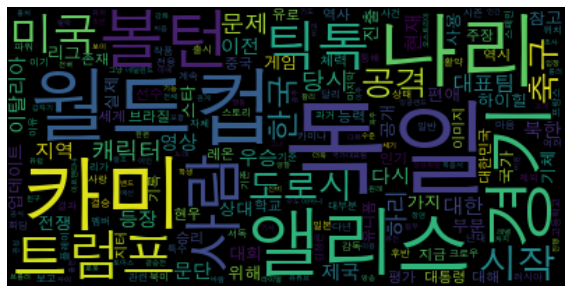

In [12]:
array = wc.to_array()
fig =plt.figure(figsize=(10,10))
plt.imshow(array, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
req.close()